Testing

Anpassen von Polygonen auf Punkte

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
DATA_PATH = "../../../../data"
ANALYSES_PATH = DATA_PATH + "/analysis/worldcover"

# Punktdaten laden (anstatt Polygone)
points = gpd.read_file(
    ANALYSES_PATH + "/Arealstatistik_Worldcover_2021_Punkte.gpkg",
    layer="Arealstatistik_Worldcover_2021_Punkte",
    driver="GPKG"
)


# Excel-Mappingtabelle laden
mapping_df = pd.read_excel(
    DATA_PATH + "/analysis/worldcover/Mapping_AS_WC_v2.xlsx"
)

# 1) Mapping: WorldCover_2021_class_1 -> IPCC_WC_Id (über Spalte WorldCover_class)
wc_to_ipcc = (
    mapping_df
    .drop_duplicates(subset="WorldCover_class")  # falls mehrfach vorhanden
    .set_index("WorldCover_class")["IPCC_WC_Id"]
    .to_dict()
)

# Neue Spalte für IPCC-IDs basierend auf WorldCover_class zuweisen
points["IPCC_WC_Id"] = points["IPCC_WC_Id_2021_Point"].map(wc_to_ipcc)
points["IPCC_WC_Id"] = points["IPCC_WC_Id"].fillna(np.nan)

# 2) Mapping: AS18_72 -> IPCC_WC_Id (direkt)
as_to_ipcc = dict(zip(mapping_df["AS18_72"], mapping_df["IPCC_WC_Id"]))
points["IPCC_AS_Id"] = points["AS18_72"].map(as_to_ipcc)
points["IPCC_AS_Id"] = points["IPCC_AS_Id"].fillna(np.nan)

# Ergebnis als Geopackage speichern
points.to_file(
    ANALYSES_PATH + "/arealstatistik_mapped_points_2021.gpkg",
    driver="GPKG"
)


c:\Users\alexa\anaconda3\envs\WC\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


matrix test 2021


c:\Users\alexa\anaconda3\envs\WC\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


<Figure size 800x600 with 0 Axes>

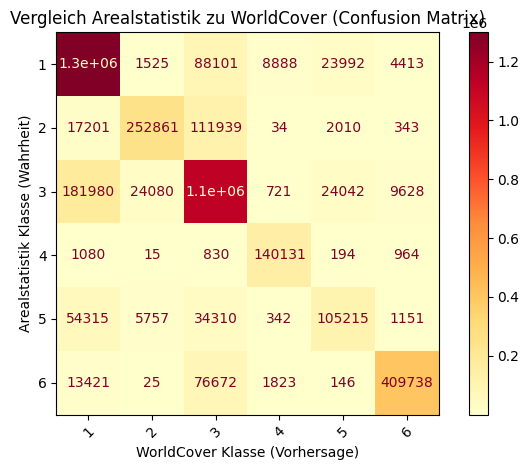

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# GeoDataFrame laden
df = gpd.read_file(ANALYSES_PATH + "/arealstatistik_mapped_points_2021.gpkg", driver="GPKG")

# Klassen vergleichen
y_true = df["IPCC_AS_Id"]
y_pred = df["IPCC_WC_Id"]

# Nur Zeilen ohne NaN in y_true und y_pred auswählen
valid_idx = (~y_true.isna()) & (~y_pred.isna())
y_true_valid = y_true[valid_idx]
y_pred_valid = y_pred[valid_idx]

# Alle Klassen bestimmen
labels = sorted(set(y_true_valid).union(set(y_pred_valid)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true_valid, y_pred_valid, labels=labels)

# Deutsche Achsen und Matrix anzeigen
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="YlOrRd", xticks_rotation=45)
plt.title("Vergleich Arealstatistik zu WorldCover (Confusion Matrix)")
plt.xlabel("WorldCover Klasse (Vorhersage)")
plt.ylabel("Arealstatistik Klasse (Wahrheit)")
plt.tight_layout()
plt.show()

Matrix test

c:\Users\alexa\anaconda3\envs\WC\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


<Figure size 800x600 with 0 Axes>

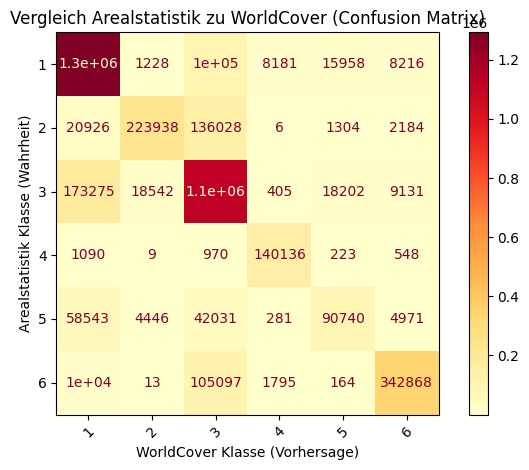

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# GeoDataFrame laden
df = gpd.read_file(ANALYSES_PATH + "/arealstatistik_mapped_points_2021.gpkg", driver="GPKG")

# Klassen vergleichen
y_true = df["IPCC_AS_Id"]
y_pred = df["IPCC_WC_Id"]

# Nur Zeilen ohne NaN in y_true und y_pred auswählen
valid_idx = (~y_true.isna()) & (~y_pred.isna())
y_true_valid = y_true[valid_idx]
y_pred_valid = y_pred[valid_idx]

# Alle Klassen bestimmen
labels = sorted(set(y_true_valid).union(set(y_pred_valid)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true_valid, y_pred_valid, labels=labels)

# Deutsche Achsen und Matrix anzeigen
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="YlOrRd", xticks_rotation=45)
plt.title("Vergleich Arealstatistik zu WorldCover (Confusion Matrix)")
plt.xlabel("WorldCover Klasse (Vorhersage)")
plt.ylabel("Arealstatistik Klasse (Wahrheit)")
plt.tight_layout()
plt.show()
